In [1]:
import pandas as pd   
import numpy as np    
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('churn.csv')
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
df1=df.drop(["Unnamed: 0","state","area.code"],axis=1)
df1

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [6]:
df1.dtypes

account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account.length  5000 non-null   int64  
 1   voice.plan      5000 non-null   object 
 2   voice.messages  5000 non-null   int64  
 3   intl.plan       5000 non-null   object 
 4   intl.mins       5000 non-null   float64
 5   intl.calls      5000 non-null   int64  
 6   intl.charge     5000 non-null   float64
 7   day.mins        5000 non-null   float64
 8   day.calls       5000 non-null   int64  
 9   day.charge      5000 non-null   object 
 10  eve.mins        5000 non-null   object 
 11  eve.calls       5000 non-null   int64  
 12  eve.charge      5000 non-null   float64
 13  night.mins      5000 non-null   float64
 14  night.calls     5000 non-null   int64  
 15  night.charge    5000 non-null   float64
 16  customer.calls  5000 non-null   int64  
 17  churn           5000 non-null   o

In [7]:
df2 = df1.copy()
df2["day.charge"] = df2["day.charge"].astype("float64")
df2["eve.mins"] = df2["eve.mins"].astype("float64")

In [8]:
df2.isnull().sum()

account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [9]:
df2.dropna(inplace = True)

In [10]:
df2.isnull().sum()

account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [11]:
df3=df2.rename(columns={"account.length":"account_length","voice.plan":"voice_plan","voice.messages":"voice_message","intl.plan":"intl_plan","intl.mins":"intl_mins",
                   "intl.calls":"intl_calls","intl.charge":"intl_charge","day.mins":"day_mins","day.calls":"day_calls","day.charge":"day_charge",
                   "eve.mins":"eve_mins","eve.calls":"eve_calls","eve.charge":"eve_charge","night.mins":"night_mins","night.calls":"night_calls",
                   "night.charge":"night_charge","night.charge":"night_charge","customer.calls":"customer_calls"})

In [12]:
df3.head()

,account_length,voice_plan,voice_message,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [13]:
df4 = df3.replace({'churn':{'yes':1, 'no':0}})

In [14]:
df4.head()

,account_length,voice_plan,voice_message,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0


In [15]:
df5=pd.get_dummies(df4,columns=['voice_plan','intl_plan'], drop_first=True)
df5

,account_length,voice_message,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn,voice_plan_yes,intl_plan_yes
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,1,0
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,1,0
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,0,0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,0,1
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,1,0
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1,0,0
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,0,0
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,0,0


In [16]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
df6 = norm_func(df5)
df6

,account_length,voice_message,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn,voice_plan_yes,intl_plan_yes
0,0.524793,0.480769,0.500,0.15,0.500000,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.111111,0.0,1.0,0.0
1,0.438017,0.500000,0.685,0.15,0.685185,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.111111,0.0,1.0,0.0
2,0.561983,0.000000,0.610,0.25,0.609259,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.000000,0.0,0.0,0.0
3,0.342975,0.000000,0.330,0.35,0.329630,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.222222,0.0,0.0,1.0
4,0.305785,0.000000,0.505,0.15,0.505556,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.769231,0.495,0.25,0.494444,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.222222,0.0,1.0,0.0
4996,0.623967,0.000000,0.735,0.10,0.735185,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.333333,1.0,0.0,0.0
4997,0.247934,0.000000,0.680,0.20,0.679630,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.111111,0.0,0.0,0.0
4998,0.446281,0.000000,0.425,0.30,0.425926,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.000000,0.0,0.0,0.0


In [18]:
X=df6.drop(["churn"],1)
y=df6["churn"]

In [19]:
X

,account_length,voice_message,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,voice_plan_yes,intl_plan_yes
0,0.524793,0.480769,0.500,0.15,0.500000,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.111111,1.0,0.0
1,0.438017,0.500000,0.685,0.15,0.685185,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.111111,1.0,0.0
2,0.561983,0.000000,0.610,0.25,0.609259,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.000000,0.0,0.0
3,0.342975,0.000000,0.330,0.35,0.329630,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.222222,0.0,1.0
4,0.305785,0.000000,0.505,0.15,0.505556,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.333333,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.769231,0.495,0.25,0.494444,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.222222,1.0,0.0
4996,0.623967,0.000000,0.735,0.10,0.735185,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.333333,0.0,0.0
4997,0.247934,0.000000,0.680,0.20,0.679630,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.111111,0.0,0.0
4998,0.446281,0.000000,0.425,0.30,0.425926,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.000000,0.0,0.0


In [20]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churn, Length: 4969, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
Xtrain.shape ,Xtest.shape ,ytrain.shape ,ytest.shape

((3478, 17), (1491, 17), (3478,), (1491,))

# MODEL BUILDING

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_df =DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=6,min_samples_leaf=8)

In [25]:
model_df.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [26]:
y_pred=model_df.predict(Xtest)

In [27]:
model_df.score(Xtest,y_pred)

1.0

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy

In [29]:
print(classification_report(ytest,y_pred,labels=[0,1]))
print("="*50)
print("Accuracy=",accuracy_score(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1254
           1       0.88      0.71      0.78       237

    accuracy                           0.94      1491
   macro avg       0.91      0.84      0.87      1491
weighted avg       0.94      0.94      0.93      1491

Accuracy= 0.937625754527163


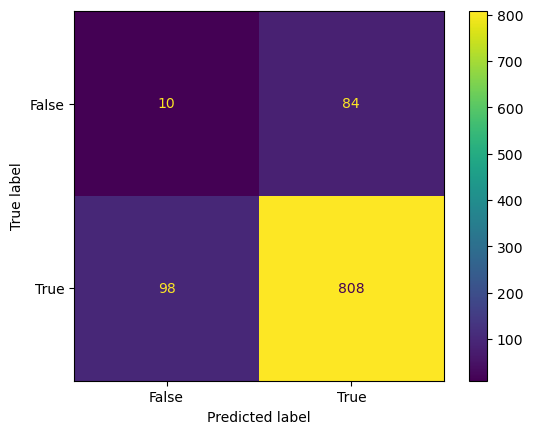

In [30]:
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

# SMOTE

In [31]:
!pip install imblearn
from imblearn.combine import SMOTEENN

In [32]:
sm=SMOTEENN()
X_resampled,y_resampled=sm.fit_resample(X,y)

In [33]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [34]:
model_df_smott =DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=6,min_samples_leaf=8)

In [35]:
model_df_smott.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [36]:
y_pred_smott=model_df_smott.predict(Xr_test)

In [37]:
print(classification_report(yr_test,y_pred_smott,labels=[0,1]))
print("="*50)
print("Accuracy=",accuracy_score(yr_test,y_pred_smott))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       983
           1       0.98      0.86      0.92      1231

    accuracy                           0.91      2214
   macro avg       0.91      0.92      0.91      2214
weighted avg       0.92      0.91      0.91      2214

Accuracy= 0.9132791327913279


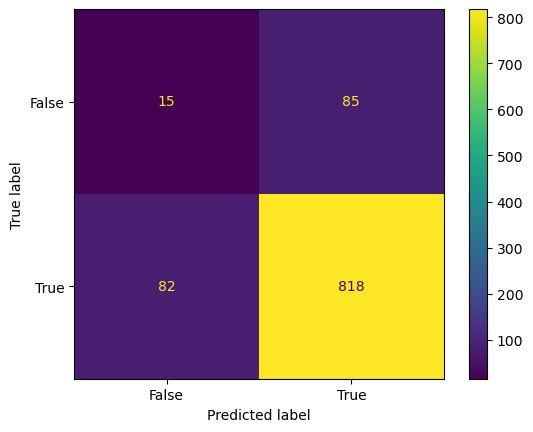

In [38]:
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [40]:
import pickle
pickle_out = open("model_df_smott.pkl","wb")
pickle.dump(model_df_smott,pickle_out)
pickle_out.close()

In [41]:
import numpy as np